<a href="https://colab.research.google.com/github/ahnhyoseung/computervision/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/50
391/391 - 36s - loss: 1.8230 - accuracy: 0.3493 - val_loss: 1.6794 - val_accuracy: 0.4027 - 36s/epoch - 93ms/step
Epoch 2/50
391/391 - 32s - loss: 1.6238 - accuracy: 0.4225 - val_loss: 1.5586 - val_accuracy: 0.4472 - 32s/epoch - 83ms/step
Epoch 3/50
391/391 - 35s - loss: 1.5372 - accuracy: 0.4528 - val_loss: 1.5360 - val_accuracy: 0.4556 - 35s/epoch - 90ms/step
Epoch 4/50
391/391 - 33s - loss: 1.4767 - accuracy: 0.4772 - val_loss: 1.4903 - val_accuracy: 0.4749 - 33s/epoch - 85ms/step
Epoch 5/50
391/391 - 34s - loss: 1.4227 - accuracy: 0.4955 - val_loss: 1.4779 - val_accuracy: 0.4673 - 34s/epoch - 86ms/step
Epoch 6/50
391/391 - 33s - loss: 1.3873 - accuracy: 0.5098 - val_loss: 1.4497 - val_accuracy: 0.4892 - 33s/epoch - 84ms/step
Epoch 7/50
391/391 - 32s - loss: 1.3441 - accuracy: 0.5236 - val_loss: 1.4242 - val_accuracy: 0.4956 - 32s/epoch - 82ms/step
Epoch 8/50
391/391 - 34s - loss: 1.3052 - accuracy: 0.5389

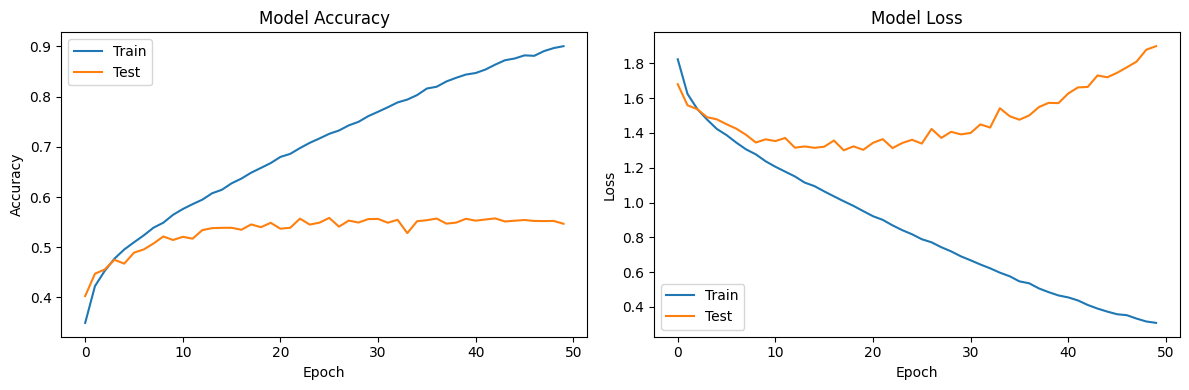

In [1]:
# CIFAR 10 데이터셋으로 학습한 모형

import numpy as np #NumPy 라이브러리를 가져오는 역할
import tensorflow as tf #TensorFlow 라이브러리를 가져오는 역할


from tensorflow.keras.datasets import cifar10 #TensorFlow의 Keras API를 통해 제공되는 CIFAR-10 데이터셋을 가져오는 역할
from tensorflow.keras.models import Sequential #TensorFlow의 Keras API를 통해 Sequential 모델을 가져오는 역할
from tensorflow.keras.layers import Dense #TensorFlow의 Keras API를 통해 Dense 레이어를 가져오는 역할
from tensorflow.keras.optimizers import Adam #TensorFlow의 Keras API를 통해 Adam 옵티마이저를 가져오는 역할


import matplotlib.pyplot as plt #Matplotlib 라이브러리를 사용하여 데이터 시각화를 위한 pyplot 모듈을 가져오는 역할



# Load CIFAR-10 dataset(이미지 분류를 위한 데이터셋)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #CIFAR-10 데이터셋을 불러와서 훈련 데이터와 테스트 데이터로 나누는 역할



# 데이터 전처리
x_train = x_train.reshape(50000, 3072).astype(np.float32) / 255.0 #CIFAR-10 데이터셋의 이미지 데이터를 전처리하는 역할
x_test = x_test.reshape(10000, 3072).astype(np.float32) / 255.0 #CIFAR-10 데이터셋의 테스트 데이터의 이미지 데이터를 전처리하는 역할
y_train = tf.keras.utils.to_categorical(y_train, 10) #CIFAR-10 데이터셋의 훈련 데이터의 레이블을 전처리하는 역할
y_test = tf.keras.utils.to_categorical(y_test, 10) #CIFAR-10 데이터셋의 테스트 데이터의 레이블을 전처리하는 역할



# Create the model(모델 생성)
dmlp = Sequential() #딥 러닝 모델에서 사용되는 Sequential 모델을 생성하는 역할
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,))) # Sequential 모델인 `dmlp`에 새로운 층을 추가하는 역할
dmlp.add(Dense(units=512, activation='relu')) #Sequential 모델 `dmlp`에 또 다른 `Dense` 층을 추가하는 역할
dmlp.add(Dense(units=512, activation='relu')) #Sequential 모델 `dmlp`에 새로운 `Dense` 층을 추가하는 역할
dmlp.add(Dense(units=10, activation='softmax')) #Sequential 모델 `dmlp`에 새로운 `Dense` 층을 추가하는 역할



# Compile the model(모델 컴파일)
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) #Sequential 모델 `dmlp`를 컴파일하는 역할



# 학습 곡선 표시를 위한 모델 학습 과정 및 수집
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2) #Sequential 모델 `dmlp`를 주어진 데이터로 학습시키는 역할



# 정확도 평가 및 출력
accuracy = dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100 #학습된 모델 `dmlp`를 사용하여 테스트 데이터 `x_test`와 레이블 `y_test`에 대한 정확도를 평가하는 역할
print('Accuracy=', accuracy) #변수 `accuracy`에 저장된 정확도를 출력하는 역할



# 학습 곡선 시각화
plt.figure(figsize=(12, 4)) #Matplotlib 라이브러리를 사용하여 그래프를 그리기 위한 새로운 그림(figure)을 생성하는 역할



#학습 및 검증 정확도 값을 그래프로 나타냄
plt.subplot(1, 2, 1) #Matplotlib 라이브러리를 사용하여 여러 개의 서브플롯(subplot) 중 첫 번째 서브플롯을 선택하는 역할
plt.plot(hist.history['accuracy'], label='Train') #Matplotlib 라이브러리를 사용하여 선 그래프를 그리는 역할
plt.plot(hist.history['val_accuracy'], label='Test') #Matplotlib 라이브러리를 사용하여 두 번째 선 그래프를 그리는 역할
plt.title('Model Accuracy') #Matplotlib 라이브러리를 사용하여 그래프의 제목을 설정하는 역할
plt.xlabel('Epoch') #Matplotlib 라이브러리를 사용하여 x축의 라벨을 설정하는 역할
plt.ylabel('Accuracy') #Matplotlib 라이브러리를 사용하여 y축의 라벨을 설정하는 역할
plt.legend() #Matplotlib 라이브러리를 사용하여 그래프의 범례(legend)를 표시하는 역할




#학습 및 검증 손실 값 표시
plt.subplot(1, 2, 2) #Matplotlib 라이브러리를 사용하여 그래프를 여러 개의 서브플롯(subplot)으로 나누고, 현재 작업 중인 서브플롯을 선택하는 역할
plt.plot(hist.history['loss'], label='Train') #Matplotlib 라이브러리를 사용하여 그래프를 그리는 역할
plt.plot(hist.history['val_loss'], label='Test') #Matplotlib 라이브러리를 사용하여 그래프를 그리는 역할
plt.title('Model Loss') #Matplotlib 라이브러리를 사용하여 그래프의 제목을 설정하는 역할
plt.xlabel('Epoch') #Matplotlib 라이브러리를 사용하여 x축의 레이블(label)을 설정하는 역할
plt.ylabel('Loss') #Matplotlib 라이브러리를 사용하여 y축의 레이블(label)을 설정하는 역할
plt.legend() #Matplotlib 라이브러리를 사용하여 그래프에 범례(legend)를 추가하는 역할




plt.tight_layout() #Matplotlib 라이브러리를 사용하여 그래프의 레이아웃(layout)을 자동으로 조정하는 역할
plt.show() #Matplotlib 라이브러리를 사용하여 그래프를 화면에 출력한다.